## iFood Data Analyst Case

#### Carolina Tavares Sancho Monteiro

This case aims to evaluate your Data skills and knowledge for two possible roles:

Data Analyst Business:

• Perform robust exploratory analysis, rich with business insights & data driven proposals to add value to the company and have strong communication skills to influence the decision making

## 3. Predictive model (classification)
Create and describe a predictive model (classification) which allows the company to maximize the profit of the next marketing campaign.

This notebook was generated locally, because of the complexity to run the models that won't work for the Databricks Community Edition.

The main library used here is PyCaret to generate the model and tuning because is very practical and productive. The summary:

1) Train the model and explorations;

2) Validate the results;

3) Evaluate the return



In [32]:
import pandas as pd
from pycaret.classification import *

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
dflr = pd.read_csv('dflr.csv')
dflr.reset_index(drop=True, inplace=True)
dflr.head(n=10)

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalMnt,Accept_Score,Sum_Purchases,Marital_Number,Education_Number
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,57,1529,0,22,0.0,2.0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,60,21,0,4,0.0,2.0
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,49,734,0,20,1.0,2.0
3,3,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,30,48,0,6,1.0,2.0
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,33,407,0,14,2.0,4.0
5,5,62513.0,0,1,16,520,42,98,0,42,...,0,0,0,0,47,702,0,20,1.0,3.0
6,6,55635.0,0,1,34,235,65,164,50,49,...,0,0,0,0,43,563,0,17,3.0,2.0
7,7,33454.0,1,0,32,76,10,56,3,1,...,0,0,0,0,29,146,0,8,2.0,4.0
8,8,30351.0,1,0,19,14,0,24,3,3,...,0,0,0,1,40,44,0,5,1.0,4.0
9,9,5648.0,1,1,68,28,0,6,1,1,...,0,0,0,0,64,36,1,1,1.0,4.0


In [35]:
dflr.columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'TotalMnt', 'Accept_Score',
       'Sum_Purchases', 'Marital_Number', 'Education_Number'],
      dtype='object')

Text(0.5, 1.0, 'Features Correlating with Response')

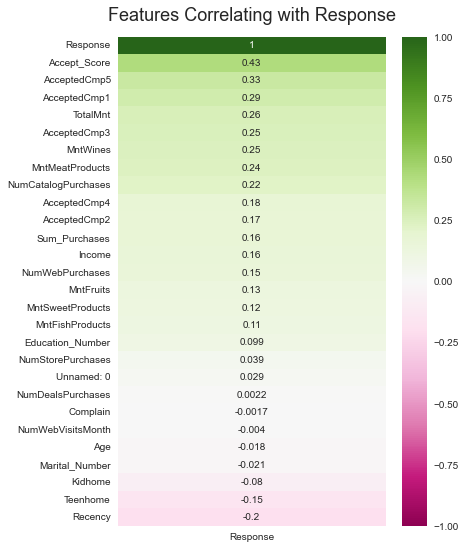

In [36]:
plt.figure(figsize=(6, 9))
heatmap = sns.heatmap(dflr.corr()[['Response']].sort_values(by='Response', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('Features Correlating with Response', fontdict={'fontsize':18}, pad=16)

In [37]:
dflr = dflr[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
        'MntMeatProducts',
      'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases',  'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
        'Response', 'TotalMnt',
       'Sum_Purchases', 'Marital_Number', 'Education_Number']]

Text(0.5, 1.0, 'Features Correlating with Response')

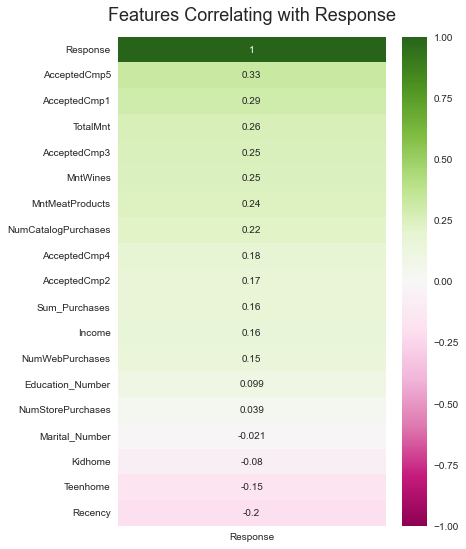

In [38]:
plt.figure(figsize=(6, 9))
heatmap = sns.heatmap(dflr.corr()[['Response']].sort_values(by='Response', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('Features Correlating with Response', fontdict={'fontsize':18}, pad=16)

In [39]:
exp_clf101 = setup(data = dflr, target = 'Response', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Response
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2240, 19)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [40]:
# Compare different models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8781,0.8531,0.3609,0.6753,0.4668,0.4054,0.4326,0.0880
rf,Random Forest Classifier,0.8775,0.8546,0.2928,0.7232,0.4145,0.3598,0.4069,0.0890
ada,Ada Boost Classifier,0.8775,0.8456,0.4205,0.6504,0.5067,0.4403,0.4562,0.0430
et,Extra Trees Classifier,0.8775,0.8238,0.3219,0.6872,0.4372,0.3788,0.4137,0.0700
ridge,Ridge Classifier,0.8768,0.0000,0.3139,0.6966,0.4281,0.3707,0.4098,0.0930
lightgbm,Light Gradient Boosting Machine,0.8762,0.8608,0.3817,0.6573,0.4791,0.4144,0.4362,0.1480
lda,Linear Discriminant Analysis,0.8730,0.8660,0.4415,0.5990,0.5058,0.4353,0.4432,0.0630
lr,Logistic Regression,0.8570,0.7523,0.1504,0.5512,0.2299,0.1826,0.2300,11.2570
dummy,Dummy Classifier,0.8513,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0040
knn,K Neighbors Classifier,0.8449,0.6680,0.1542,0.4329,0.2252,0.1620,0.1891,0.0660


Precisão como métrica de foco (quanto mais perto do zero pior) - estudar pra justificar

The best models are highlighted in yellow. 
After trainning and predicting the models, I can seen by the precision that the best model to solve my problem is the Random Forest.

In [41]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8535,0.8473,0.2083,0.5556,0.3030,0.2396,0.2759
1,0.8535,0.8449,0.1667,0.5714,0.2581,0.2030,0.2513
2,0.8662,0.8706,0.2917,0.6364,0.4000,0.3362,0.3688
3,0.8662,0.8400,0.3043,0.5833,0.4000,0.3330,0.3554
4,0.8981,0.8717,0.3913,0.8182,0.5294,0.4801,0.5214
5,0.8981,0.8405,0.3478,0.8889,0.5000,0.4551,0.5177
6,0.9045,0.8832,0.3478,1.0000,0.5161,0.4766,0.5593
7,0.8910,0.9153,0.3043,0.8750,0.4516,0.4064,0.4771
8,0.8718,0.8593,0.3043,0.6364,0.4118,0.3497,0.3798


In [42]:
#tune the model
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8280,0.7664,0.1250,0.3333,0.1818,0.1074,0.1237
1,0.8471,0.7694,0.1250,0.5000,0.2000,0.1479,0.1923
2,0.8854,0.7422,0.3750,0.7500,0.5000,0.4433,0.4774
3,0.8408,0.7617,0.1739,0.4000,0.2424,0.1686,0.1870
4,0.8917,0.7940,0.3913,0.7500,0.5143,0.4600,0.4910
5,0.8726,0.7437,0.2609,0.6667,0.3750,0.3189,0.3628
6,0.8662,0.8297,0.2174,0.6250,0.3226,0.2672,0.3136
7,0.8846,0.8473,0.6522,0.6000,0.6250,0.5570,0.5576
8,0.8333,0.7713,0.3913,0.4286,0.4091,0.3123,0.3127


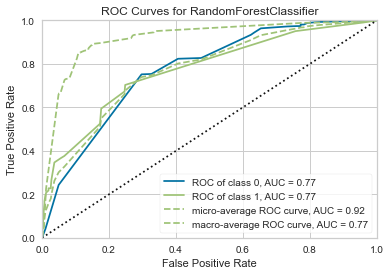

In [43]:
plot_model(tuned_rf, plot = 'auc')

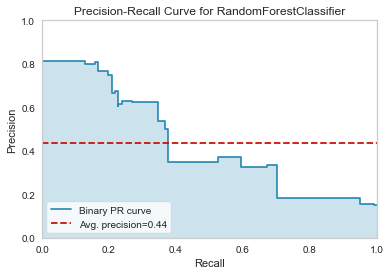

In [44]:
plot_model(tuned_rf, plot = 'pr')

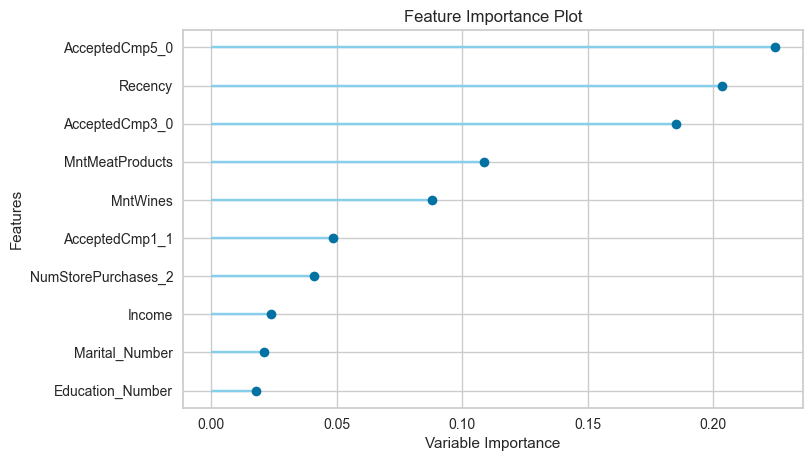

In [45]:
plot_model(tuned_rf, plot='feature')

As the graphic below shows, the 5 most important features to the model was:
- Acceptance of Campaign 5;
- Recency;
- Acceptance of Campaign 3;
- Amount of Meat Products;
- Amount of Wine products.

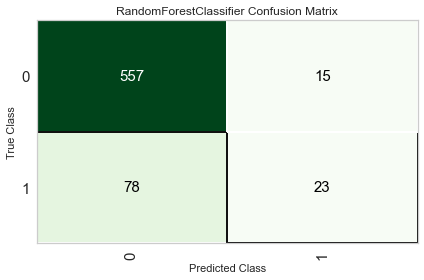

In [46]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [47]:
predict_new = predict_model(tuned_rf, data = dflr)
predict_new.tail()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8862,0.8288,0.3353,0.7724,0.4676,0.4148,0.4604


,Income,Kidhome,Teenhome,Recency,MntWines,MntMeatProducts,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,TotalMnt,Sum_Purchases,Marital_Number,Education_Number,Label,Score
2235,61223.0,0,1,46,709,182,9,3,4,0,...,0,0,0,0,1094,16,2.0,2.0,0,0.8346
2236,64014.0,2,1,56,406,30,8,2,5,0,...,0,1,0,0,436,15,1.0,4.0,0,0.9426
2237,56981.0,0,0,91,908,217,2,3,13,0,...,0,0,0,0,1217,18,3.0,2.0,0,0.8346
2238,69245.0,0,1,8,428,214,6,5,10,0,...,0,0,0,0,782,21,1.0,3.0,0,0.7688
2239,52869.0,1,1,40,84,61,3,1,4,0,...,0,0,0,1,151,8,2.0,4.0,0,0.9426


In [48]:
predict_new['result'] = predict_new['Response'] == predict_new['Label']
predict_new.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntMeatProducts,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,...,AcceptedCmp1,AcceptedCmp2,Response,TotalMnt,Sum_Purchases,Marital_Number,Education_Number,Label,Score,result
2235,61223.0,0,1,46,709,182,9,3,4,0,...,0,0,0,1094,16,2.0,2.0,0,0.8346,True
2236,64014.0,2,1,56,406,30,8,2,5,0,...,1,0,0,436,15,1.0,4.0,0,0.9426,True
2237,56981.0,0,0,91,908,217,2,3,13,0,...,0,0,0,1217,18,3.0,2.0,0,0.8346,True
2238,69245.0,0,1,8,428,214,6,5,10,0,...,0,0,0,782,21,1.0,3.0,0,0.7688,True
2239,52869.0,1,1,40,84,61,3,1,4,0,...,0,0,1,151,8,2.0,4.0,0,0.9426,False


In [49]:
predict_new['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [50]:
predict_new['result'].value_counts()

True     1985
False     255
Name: result, dtype: int64

In [51]:
predict_new['result'].value_counts(normalize=True)

True     0.886161
False    0.113839
Name: result, dtype: float64

### With the model I chose to predict, I had 1985 right predictions and 255 wrong predictions, what give us a result of 88% of success and 11% of failure.

It means that in the first scenario, with 2240 customers only 334 of them bought the gadget and 1906 didnt. 
If they already had that model, it would have told them thar 88% of people who didnt accept the offer would do that (1906) = 1677, we would send the offer only to 11% of 1677: 185 customers + the 334 customers who accepted. 
We could have spend only 519x3 - 1557MU. With 3674 of revenue it would give us a profit of 2117MU.

# Tableau Dashboards:

https://public.tableau.com/app/profile/carolina.tavares.sancho.monteiro/viz/Case_DA/Case_IFOOD